In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neural_network import MLPClassifier
from classifier import MLPBinary
import utils

L = 10
T_CRIT = 2.2691853

In [ ]:
# resizing of the data created with monte carlo

lt, ut, t_step = 1.0, 3.2, 0.003

#for L in [10, 15, 20]:
 #   utils.resize_data(L, lt, ut)
    
utils.resize_data_test(10)

clf = MLPBinary(dim_hidden=100, tolerance=1e-4, activation='relu', lr=0.001, batch_size=400, momentum=0.9, solver='sgd', alpha=0, power_t=0.01, n_epochs_no_update=3)

MLPBinary(dim_hidden=100, tolerance=1e-4, activation='relu', lr=0.003, batch_size=200, momentum=0.5, solver='sgd', alpha=0.001, power_t=0.01, n_epochs_no_update=3)

buono anche secondo ma loss alta

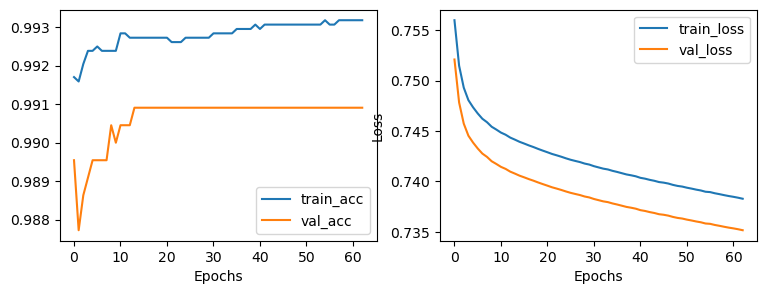

In [14]:
# NORMAL CLASSIFIER, TRAINED ON cut DATA
clf = utils.train_classifier(10, 'cut', MLPBinary(dim_hidden=100, tolerance=1e-4, activation='relu', lr=0.01, batch_size=200, momentum=0.9, solver='sgd', alpha=0.1, power_t=0.5, n_epochs_no_update=5))

In [39]:
data_per_temperature[12,0,:].shape

(100,)

In [ ]:
clf.predict_probabilities(data_per_temperature[12,:1,:])

array([[0.44995494]])

In [7]:
# loading data for testing
temp_test = np.load(f"./data/{L}_test_temp.npy")    # shape (10, 24)
data_test = np.load(f"./data/{L}_test.npy")         # shape (10, 24, 100)

# Create mask for filtering along axis 1
mask = (temp_test > max_bound) | (temp_test < 2.2)        # shape (10, 24), bool

# Filter each group, preserving the first dimension
filtered_temps = [temp_test[i][mask[i]] for i in range(temp_test.shape[0])]  # list of arrays, each (something,)
filtered_data = [data_test[i][mask[i]] for i in range(data_test.shape[0])]   # list of arrays, each (something, 100)

# Sort within each group
for i in range(len(filtered_temps)):
    sort_idx = np.argsort(filtered_temps[i])
    filtered_temps[i] = filtered_temps[i][sort_idx]
    filtered_data[i] = filtered_data[i][sort_idx]

# Optionally, convert lists to arrays for further processing
filtered_temps = np.array(filtered_temps)  # shape (10, something)
filtered_data = np.array(filtered_data)    # shape (10, something, 100)
temp_test = filtered_temps
data_test = filtered_data
t_test = (temp_test > T_CRIT).astype(int)

# PREDICTION ON DATA SET to have mean
flattened = data_test.reshape(-1, L*L)
y = clf.predict_probabilities(flattened).reshape(10, 20,1)

plt.errorbar(temp_test[3], y[:,:,0].mean(axis=0), y[:,:,0].std(axis=0)/np.sqrt(10), fmt='s--g')


ValueError: cannot reshape array of size 190 into shape (10,20,1)

All Data : 0.9208333333333333
Data with T < 2.0 or T > 2.4 : 0.955
Data with 2.0 < T < 2.4: 0.75


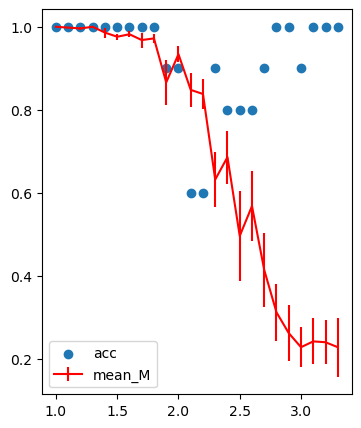

In [ ]:
# accuracy on test data, close and far from T_C 
# loading data for testing
data_test = np.load(f"./data/{L}_test.npy").reshape(-1, L*L)
temp_test = np.load(f"./data/{L}_test_temp.npy").reshape(-1,)

t_test = (temp_test > T_CRIT).astype(int)

min_bound = 2.0
max_bound = 2.4

mask = (temp_test > max_bound) | (temp_test < min_bound)   

print(f"All Data : {clf.score(data_test, t_test)}")
print(f"Data with T < {min_bound} or T > {max_bound} : {clf.score(data_test[mask], t_test[mask])}")
print(f"Data with {min_bound} < T < {max_bound}: {clf.score(data_test[~mask], t_test[~mask])}")

# ACCURACY AS FUNCTION OF TEMPERATURE

data_test = np.load(f"./data/{L}_test.npy").reshape(10, 24, L*L)
temp_test = np.load(f"./data/{L}_test_temp.npy").reshape(10, 24)

index = np.argsort(temp_test, axis=1)
temp_test = np.sort(temp_test, axis=1)
index_expanded = index[..., np.newaxis]
data_test = np.take_along_axis(data_test, index_expanded, axis=1)

data_per_temperature = np.array([data_test[:, i, :] for i in range(24)])
temp_test = np.array([temp_test[:, i] for i in range(24)])
t_test = (temp_test > T_CRIT).astype(int).reshape(24,10)

acc  = [clf.score(data_per_temperature[i, :, :], t_test[i, :]) for i in range(24)]
mean_M = np.mean(abs(np.mean(data_per_temperature[:,:, :], axis=2)), axis=1)
err_M = np.std(abs(np.mean(data_per_temperature[:,:, :], axis=2)), axis = 1, ddof=1) / np.sqrt(10)
temp = np.arange(1, 3.4, 0.1)
plt.figure(figsize=(4,5))
plt.scatter(temp, acc,)
plt.errorbar(temp, mean_M, err_M, color= 'r')
plt.legend(['acc', 'mean_M'])
plt.grid(True)
plt.show()

## SKLEARN

In [ ]:
# training with sklearn

# using skleanr
clf = MLPClassifier(activation='relu', solver='sgd',alpha=0, momentum=1, nesterovs_momentum=False, power_t=1, verbose=False)
clf.fit(data_train, t_train)

# plotting accuracy and loss
fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2, figsize=(9,3))


E = len(clf.loss_curve_) 
ax1.plot(np.arange(E), clf.loss_curve_)

ax1.legend(["train_acc", "val_acc"])

ax2.set_ylabel("Loss"), ax2.set_xlabel("Accuracy")
ax1.set_xlabel("Epochs"), ax2.set_xlabel("Epochs")
ax2.legend(["train_loss", "val_loss"])


NameError: name 'data_train' is not defined

In [ ]:
a = clf.coefs_[1].flatten()
a @ a.T

AttributeError: 'MLPBinary' object has no attribute 'coefs_'

In [ ]:
train_size = 10
errors = y[:,:,1].std(axis=0, ddof=1) / np.sqrt(train_size)  # std/(N-1)
plt.errorbar(temp_test[3], y[:,:,1].mean(axis=0), errors, fmt='s--g')

plt.grid(True)

In [ ]:
out = clf.predict_proba(data_val)
plt.scatter(temps[a:], out[:,1], marker='x', c=clf.predict(data_val) )
plt.vlines(T_CRIT, 0, 1)